In [6]:
"Example BVP w/ boundary conditions"
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def bvpexam_rhs (y,x):
    return [ y[1], -(x**2 -np.sin(x))*y[1] + np.cos(x)**2*y[0] + 5]

xspan = [0,1]
A = -3
dA = 0.5

for j in range(100):
    y0 = [3, A]
    x = np.linspace(xspan[0], xspan[1], 100)
    ysol = odeint(bvpexam_rhs, y0, x)

    if abs(ysol[-1,1]-5) < 10**(-6):
        break
    if ysol[-1,1] < 5:
        A += dA
    else:
        A -= dA
        dA /= 2

In [7]:
display(j)

48

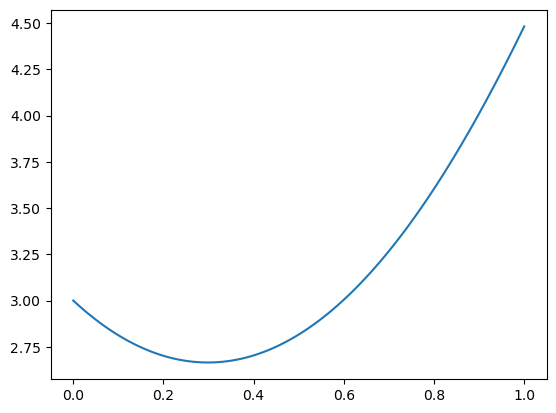

In [11]:
plt.plot(x,ysol[:,0])

97.53271484375
90.12998046875
77.79560546875001
60.52373046875002
38.314355468750016


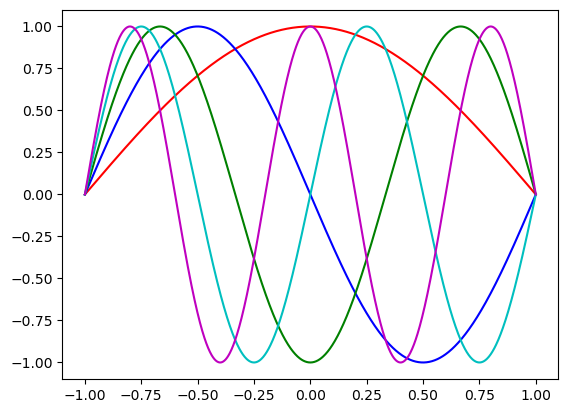

In [38]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt

def shoot2(x, dummy, n0, beta):
    return [x[1], (beta - n0) * x[0]]

tol = 1e-4  # define a tolerance level 
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors
n0 = 100; A = 1; x0 = [0, A]; xp = [-1, 1] 
xshoot =  np.linspace(xp[0], xp[1],1000)

beta_start = n0  # beginning value of beta
for modes in range(1, 6):  # begin mode loop
    beta = beta_start  # initial value of eigenvalue beta
    dbeta = n0 / 100  # default step size in beta
    for _ in range(1000):  # begin convergence loop for beta
        y = odeint(shoot2, x0, xshoot, args=(n0,beta)) 
       # y = RK45(shoot2, xp[0], x0, xp[1], args=(n0,beta)) 

        if abs(y[-1, 0] - 0) < tol:  # check for convergence
            print(beta)  # write out eigenvalue
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * y[-1, 0] > 0:
            beta -= dbeta
        else:
            beta += dbeta / 2
            dbeta /= 2

    beta_start = beta - 0.1  # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xshoot)  # calculate the normalization
    plt.plot(xshoot, y[:, 0] / np.sqrt(norm), col[modes - 1])  # plot modes

plt.show()  # end mode loop

[0.999999976777194]
[array([1.00000000e+00, 1.47137114e+00, 2.15359275e+00, 3.12750883e+00,
       4.50113583e+00, 6.41660078e+00, 9.05819213e+00, 1.26614094e+01,
       1.75227759e+01, 2.40100232e+01, 3.25720702e+01, 4.37480176e+01,
       5.81741636e+01, 7.65878538e+01, 9.98268164e+01, 1.28822549e+02,
       1.64586337e+02, 2.08186625e+02, 2.60716781e+02, 3.23252755e+02,
       3.96800821e+02, 4.82236367e+02, 5.80235665e+02, 6.91203520e+02,
       8.15200658e+02, 9.51875522e+02, 1.10040575e+03, 1.25945485e+03,
       1.42714930e+03, 1.60108087e+03, 1.77833750e+03, 1.95556456e+03,
       2.12905650e+03, 2.29487625e+03, 2.44899789e+03, 2.58746573e+03,
       2.70656124e+03, 2.80296816e+03, 2.87392565e+03, 2.91735948e+03,
       2.93198281e+03, 2.91735949e+03, 2.87392568e+03, 2.80296821e+03,
       2.70656129e+03, 2.58746579e+03, 2.44899796e+03, 2.29487633e+03,
       2.12905659e+03, 1.95556467e+03, 1.77833760e+03, 1.60108098e+03,
       1.42714940e+03, 1.25945494e+03, 1.10040584e+03, 9

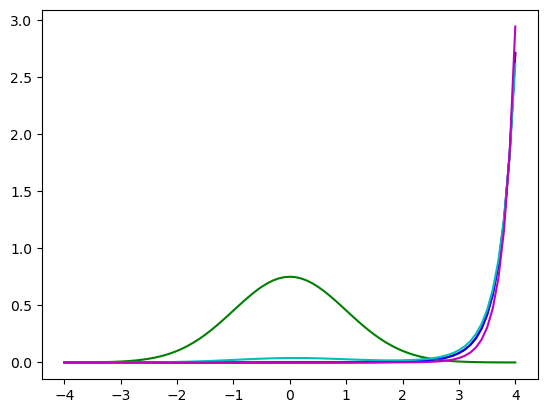

In [42]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

L = 4
tol = 1e-6   
col = ['r', 'b', 'g', 'c', 'm', 'k']  # Colors for eigenfunctions

def shoot(y, x, E):
    return [y[1], (x**2 - E) * y[0]]

x = np.arange(-L, L + 0.1, 0.1)  # Simulate from -L to L

eigenvalues = []
eigenfunctions = []

E_start = .1  # Initial guess for the eigenvalue

for modes in range(1, 6):
    E = E_start
    dE = E_start / 100  
    for _ in range(1000):   
        # Set initial conditions for the current guess of E
        y0 = [1, np.sqrt(L ** 2 - E)]
        ys = odeint(shoot, y0, x, args=(E,))
        
        # Check convergence at the right boundary (expecting decay)
        if abs(ys[-1, 1] + np.sqrt(L**2 - E) * ys[-1, 0] - 0) < tol:
            eigenvalues.append(E)
            eigenfunctions.append(ys[:, 0])  # Save the eigenfunction
            break
        
        # Update eigenvalue guess based on the shooting method
        if (-1) ** (modes + 1) * (ys[-1, 1] + np.sqrt(L**2 - E) * ys[-1, 0]) > 0:
            E -= dE 
        else:
            E += dE / 2  
            dE /= 2  

    
    E_start = E - 0.1
    norm = np.trapz(ys[:, 0] * ys[:, 0], x)  # Normalize the eigenfunction
    plt.plot(x, ys[:, 0] / np.sqrt(norm), col[modes - 1], label=f'Mode {modes}')  # Plot modes

# Print all eigenvalues found
print(eigenvalues)
print(eigenfunctions)


plt.show()
